In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import itertools
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
while os.path.basename(os.getcwd()) != 'Solar_PV_Study':
    os.chdir('../')

In [3]:
data_min = pd.read_csv(os.path.join('processed_data', 'Combined_Data_with_Voltages.csv'), index_col=0)
data_min.index = pd.to_datetime(data_min.index)
print(data_min.shape)
data_min.head()

(144000, 17)


,PTemp_C_Max,AirTC_Avg,RH,WS_ms_Avg,WindDir,TPM1,TPM2.5,TPM10,GeffRef,TempRef,Cycle,Rainfall,Daylight,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2
DateTime,,,,,,,,,,,,,,,,,
2022-01-10 00:00:00,14.130,14.17,70.200,0.0810,252.700,42.0,62.0,70.0,0.000559,11.0750,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 00:01:00,14.116,14.15,70.322,0.0742,215.844,42.0,62.0,67.0,0.001397,11.0625,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 00:02:00,14.102,14.13,70.444,0.0674,178.988,44.0,61.0,64.0,0.002235,11.0500,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 00:03:00,14.088,14.11,70.566,0.0606,142.132,45.0,64.0,68.0,0.006148,11.0250,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-10 00:04:00,14.074,14.09,70.688,0.0538,105.276,44.0,63.0,67.0,0.000559,10.9900,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_hour = pd.read_csv(os.path.join('processed_data', 'Combined_Data_with_Voltages_Hourly.csv'), index_col=0)
data_hour.index = pd.to_datetime(data_hour.index)
print(data_hour.shape)
data_hour.head()

(2400, 16)


,PTemp_C_Max,AirTC_Avg,RH,WS_ms_Avg,TPM1,TPM2.5,TPM10,GeffRef,TempRef,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2,Cycle,Rainfall,Daylight
DateTime,,,,,,,,,,,,,,,,
2022-01-10 00:00:00,13.670000,13.795000,71.902500,0.112933,44.916667,64.791667,70.033333,0.006495,10.823375,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2022-01-10 01:00:00,12.868333,13.155833,75.057167,0.433200,50.791667,74.925000,81.900000,0.006708,10.469500,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2022-01-10 02:00:00,12.124333,11.745167,81.215333,1.485300,66.733333,100.466667,111.350000,0.006142,10.074750,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2022-01-10 03:00:00,11.233167,11.026833,84.880000,1.604900,60.316667,90.125000,99.475000,0.008116,9.482000,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2022-01-10 04:00:00,10.603333,10.617000,86.345000,1.674150,60.108333,93.383333,103.741667,0.009044,9.138333,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [5]:
# Resample Voltage columns to Daily
data_daily = data_min.filter(regex='Voltage')
data_daily = data_daily.resample('D').sum()
data_daily.head()

,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2
DateTime,,,,
2022-01-10,8030.765,7988.095,8236.495,8230.490
2022-01-11,7944.765,7878.645,8119.190,8098.225
2022-01-12,7774.985,7684.150,7940.385,7888.450
2022-01-13,7848.560,7739.150,8037.415,7983.445
2022-01-14,7937.250,7805.740,8100.810,8037.890


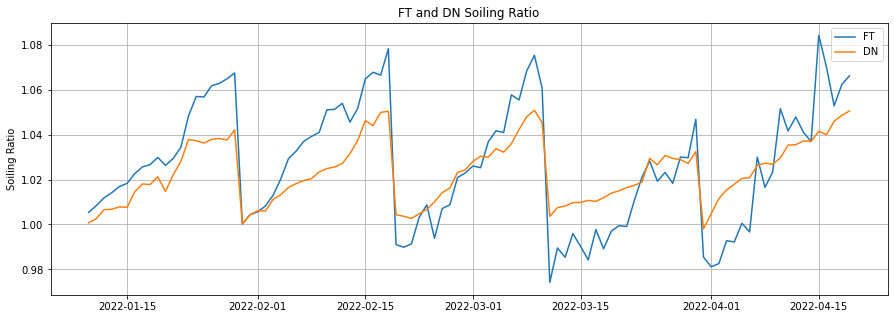

In [6]:
soiling_FT = data_daily['FT_Voltage1'] / data_daily['FT_Voltage2']
soiling_DN = data_daily['DN_Voltage1'] / data_daily['DN_Voltage2']

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(soiling_FT, label='FT')
ax.plot(soiling_DN, label='DN')
ax.set_title('FT and DN Soiling Ratio')
ax.set_ylabel('Soiling Ratio')
ax.legend()
plt.grid()
plt.show()

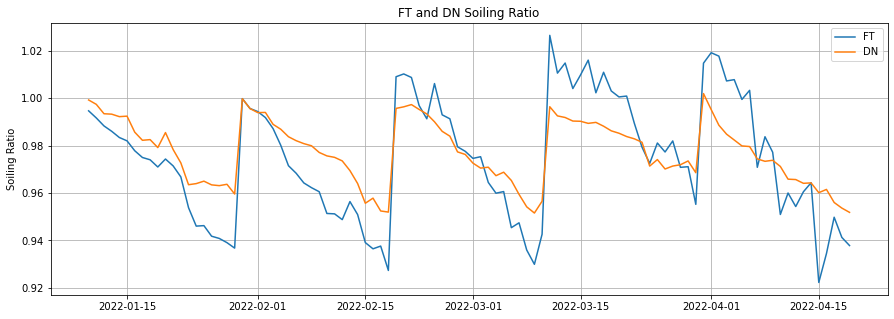

In [7]:
soiling_FT = data_daily['FT_Voltage2'] / data_daily['FT_Voltage1']
soiling_DN = data_daily['DN_Voltage2'] / data_daily['DN_Voltage1']

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(soiling_FT, label='FT')
ax.plot(soiling_DN, label='DN')
ax.set_title('FT and DN Soiling Ratio')
ax.set_ylabel('Soiling Ratio')
ax.legend()
plt.grid()
plt.show()

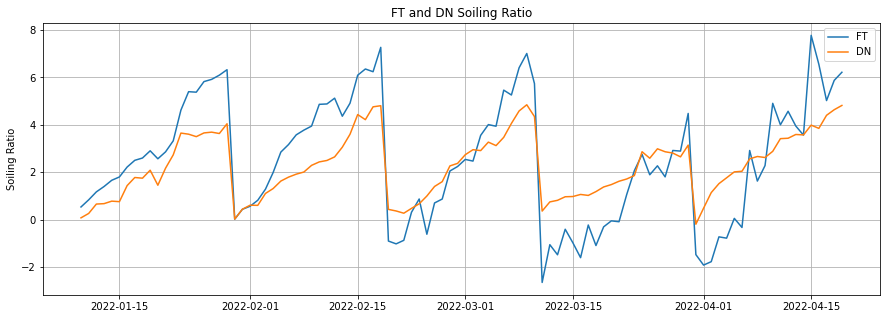

In [8]:
soiling_FT = ((data_daily['FT_Voltage1'] - data_daily['FT_Voltage2']) / data_daily['FT_Voltage1'])*100
soiling_DN = ((data_daily['DN_Voltage1'] - data_daily['DN_Voltage2']) / data_daily['DN_Voltage1'])*100

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(soiling_FT, label='FT')
ax.plot(soiling_DN, label='DN')
ax.set_title('FT and DN Soiling Ratio')
ax.set_ylabel('Soiling Ratio')
ax.legend()
plt.grid()
plt.show()

In [12]:
temp = data_hour.copy()
# Drop Cycle
temp.drop(columns=['Cycle', 'Rainfall'], inplace=True)
temp

,PTemp_C_Max,AirTC_Avg,RH,WS_ms_Avg,TPM1,TPM2.5,TPM10,GeffRef,TempRef,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2,Daylight
DateTime,,,,,,,,,,,,,,
2022-01-10 00:00:00,13.670000,13.795000,71.902500,0.112933,44.916667,64.791667,70.033333,0.006495,10.823375,0.0,0.0,0.00,0.00,0.0
2022-01-10 01:00:00,12.868333,13.155833,75.057167,0.433200,50.791667,74.925000,81.900000,0.006708,10.469500,0.0,0.0,0.00,0.00,0.0
2022-01-10 02:00:00,12.124333,11.745167,81.215333,1.485300,66.733333,100.466667,111.350000,0.006142,10.074750,0.0,0.0,0.00,0.00,0.0
2022-01-10 03:00:00,11.233167,11.026833,84.880000,1.604900,60.316667,90.125000,99.475000,0.008116,9.482000,0.0,0.0,0.00,0.00,0.0
2022-01-10 04:00:00,10.603333,10.617000,86.345000,1.674150,60.108333,93.383333,103.741667,0.009044,9.138333,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-19 19:00:00,38.847000,37.026333,23.609167,0.032633,15.533333,23.616667,26.033333,0.183493,34.237000,0.3,0.3,0.23,0.23,0.0
2022-04-19 20:00:00,36.744833,35.075000,28.273500,0.142200,31.741667,46.975000,51.366667,0.025791,32.236417,0.0,0.0,0.00,0.00,0.0
2022-04-19 21:00:00,34.795000,33.594333,32.132667,0.420933,53.025000,80.208333,87.400000,0.029238,31.160583,0.0,0.0,0.00,0.00,0.0


In [ ]:
# 24 hours in a day x [PTemp_C_Max, AirTC_Avg, RH, WS_ms_Avg, TPM1, TPM2.5, TPM10]
# 24 x 7 = 168 (input features)

In [42]:
temp = data_hour.copy()
temp.drop(columns=['Cycle', 'Rainfall'], inplace=True)

X = pd.DataFrame()
X['Day'] = np.arange(1, 100+1)
X.set_index('Day', inplace=True)

for day_idx, day in tqdm(enumerate(pd.date_range('2022-01-10', '2022-04-19'))):
    for hr in range(24):
        for col in ['AirTC_Avg', 'RH', 'WS_ms_Avg', 'TPM1', 'TPM2.5', 'TPM10', 'Daylight']:
            X.loc[day_idx+1, f'{col}_{hr+1:02d}'] = temp.loc[f"{day} {hr:02d}:00:00", col]

X = X.reindex(sorted(X.columns), axis=1)
X

0it [00:00, ?it/s]

100it [00:06, 15.69it/s]


,AirTC_Avg_01,AirTC_Avg_02,AirTC_Avg_03,AirTC_Avg_04,AirTC_Avg_05,AirTC_Avg_06,AirTC_Avg_07,AirTC_Avg_08,AirTC_Avg_09,AirTC_Avg_10,...,WS_ms_Avg_15,WS_ms_Avg_16,WS_ms_Avg_17,WS_ms_Avg_18,WS_ms_Avg_19,WS_ms_Avg_20,WS_ms_Avg_21,WS_ms_Avg_22,WS_ms_Avg_23,WS_ms_Avg_24
Day,,,,,,,,,,,,,,,,,,,,,
1,13.795000,13.155833,11.745167,11.026833,10.617000,10.162500,9.861667,9.917000,11.729000,14.273500,...,1.935833,1.753950,1.783283,1.218533,0.453033,0.628083,0.887500,0.945250,0.657283,0.858983
2,13.201333,12.228833,11.664833,12.138500,12.049500,11.693167,11.511500,11.525333,12.585333,15.055333,...,2.214683,1.282683,0.849100,0.890433,0.147367,0.128533,0.068767,0.117967,0.405917,0.692017
3,13.257500,11.948833,11.109000,10.811000,10.513833,10.049333,10.561000,11.074833,12.071833,14.808500,...,2.592667,2.293217,1.942933,1.333617,0.579133,0.685967,1.096483,1.065567,0.878133,1.194117
4,13.726500,12.010333,10.946833,10.513833,9.836167,9.733500,9.917500,9.999500,11.328167,14.202000,...,1.783500,1.847083,1.770217,1.772467,1.059000,1.110417,1.182050,1.645600,1.688117,1.304700
5,13.205167,12.740333,12.022667,11.504667,10.411833,9.630500,9.863833,9.291333,11.149000,14.891500,...,1.684000,1.806100,1.683633,1.706700,0.648733,0.837883,0.748133,0.912267,0.572417,1.089083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30.171333,29.056833,28.011833,27.081167,26.986000,26.532000,26.016000,26.528333,27.933333,30.200833,...,1.317717,1.416767,1.324867,1.264983,0.934950,0.701333,1.282150,1.768617,1.497617,1.541533
97,28.887333,28.810500,28.066500,26.074667,25.335000,24.961167,24.543500,24.161667,26.282833,30.057500,...,1.009767,0.991383,0.859617,0.910233,0.942100,0.911550,1.181033,1.755300,1.308833,1.236183
98,30.016333,29.958167,29.491333,28.479833,27.448000,26.471667,25.754500,26.784333,28.738500,31.382667,...,1.009967,1.248783,1.140017,0.971250,0.861267,0.648550,1.380917,1.882400,1.671167,1.288300


In [40]:
# for col in data_daily.columns:
#     X[col] = data_daily[col].values
# X

,AirTC_Avg_01,AirTC_Avg_02,AirTC_Avg_03,AirTC_Avg_04,AirTC_Avg_05,AirTC_Avg_06,AirTC_Avg_07,AirTC_Avg_08,AirTC_Avg_09,AirTC_Avg_10,...,WS_ms_Avg_19,WS_ms_Avg_20,WS_ms_Avg_21,WS_ms_Avg_22,WS_ms_Avg_23,WS_ms_Avg_24,FT_Voltage1,FT_Voltage2,DN_Voltage1,DN_Voltage2
Day,,,,,,,,,,,,,,,,,,,,,
1,13.795000,13.155833,11.745167,11.026833,10.617000,10.162500,9.861667,9.917000,11.729000,14.273500,...,0.453033,0.628083,0.887500,0.945250,0.657283,0.858983,8030.765,7988.095,8236.495,8230.490
2,13.201333,12.228833,11.664833,12.138500,12.049500,11.693167,11.511500,11.525333,12.585333,15.055333,...,0.147367,0.128533,0.068767,0.117967,0.405917,0.692017,7944.765,7878.645,8119.190,8098.225
3,13.257500,11.948833,11.109000,10.811000,10.513833,10.049333,10.561000,11.074833,12.071833,14.808500,...,0.579133,0.685967,1.096483,1.065567,0.878133,1.194117,7774.985,7684.150,7940.385,7888.450
4,13.726500,12.010333,10.946833,10.513833,9.836167,9.733500,9.917500,9.999500,11.328167,14.202000,...,1.059000,1.110417,1.182050,1.645600,1.688117,1.304700,7848.560,7739.150,8037.415,7983.445
5,13.205167,12.740333,12.022667,11.504667,10.411833,9.630500,9.863833,9.291333,11.149000,14.891500,...,0.648733,0.837883,0.748133,0.912267,0.572417,1.089083,7937.250,7805.740,8100.810,8037.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,30.171333,29.056833,28.011833,27.081167,26.986000,26.532000,26.016000,26.528333,27.933333,30.200833,...,0.934950,0.701333,1.282150,1.768617,1.497617,1.541533,8099.225,7469.920,8203.790,7876.995
97,28.887333,28.810500,28.066500,26.074667,25.335000,24.961167,24.543500,24.161667,26.282833,30.057500,...,0.942100,0.911550,1.181033,1.755300,1.308833,1.236183,7967.235,7445.445,8070.170,7759.770
98,30.016333,29.958167,29.491333,28.479833,27.448000,26.471667,25.754500,26.784333,28.738500,31.382667,...,0.861267,0.648550,1.380917,1.882400,1.671167,1.288300,7922.760,7525.105,8268.625,7905.025


In [41]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
from jax import random
from jax.scipy.stats import norm
from jax.scipy.special import expit
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility
np.random.seed(0)

In [45]:
Y = pd.DataFrame(((data_daily['DN_Voltage1'] - data_daily['DN_Voltage2']) / data_daily['DN_Voltage1'])*100)
Y.reset_index(drop = True, inplace=True)
Y

,0
0,0.072907
1,0.258215
2,0.654061
3,0.671485
4,0.776712
...,...
95,3.983464
96,3.846263
97,4.397345
98,4.633213


In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Add a "Days" column
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled['Days'] = np.tile(np.arange(1, 21), 5)
X_scaled

,AirTC_Avg_01,AirTC_Avg_02,AirTC_Avg_03,AirTC_Avg_04,AirTC_Avg_05,AirTC_Avg_06,AirTC_Avg_07,AirTC_Avg_08,AirTC_Avg_09,AirTC_Avg_10,...,WS_ms_Avg_16,WS_ms_Avg_17,WS_ms_Avg_18,WS_ms_Avg_19,WS_ms_Avg_20,WS_ms_Avg_21,WS_ms_Avg_22,WS_ms_Avg_23,WS_ms_Avg_24,Days
0,-1.630653,-1.617310,-1.768901,-1.778853,-1.781250,-1.836245,-1.833459,-1.741531,-1.635592,-1.716372,...,1.333523,1.721645,0.886629,-0.126097,0.660453,1.085820,0.851091,0.053046,0.438665,1
1,-1.730606,-1.774297,-1.782724,-1.584307,-1.523239,-1.548741,-1.516007,-1.444265,-1.488347,-1.584045,...,0.368893,-0.349106,0.104353,-1.052019,-0.731486,-0.967141,-0.968242,-0.492200,0.072052,2
2,-1.721149,-1.821715,-1.878363,-1.816625,-1.799831,-1.857501,-1.698897,-1.527530,-1.576643,-1.625822,...,2.437341,2.075532,1.161018,0.255883,0.821738,1.609842,1.115688,0.532098,1.174527,3
3,-1.642186,-1.811300,-1.906266,-1.868630,-1.921887,-1.916823,-1.822715,-1.726283,-1.704515,-1.728473,...,1.524157,1.692681,2.207351,1.709489,2.004419,1.824400,2.391278,2.289054,1.417338,4
4,-1.729960,-1.687675,-1.721153,-1.695230,-1.818202,-1.936170,-1.833042,-1.857172,-1.735323,-1.611774,...,1.440268,1.500756,2.050546,0.466714,1.245036,0.736360,0.778556,-0.131040,0.943903,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.126537,1.075517,1.030019,1.030714,1.167002,1.238424,1.274865,1.328721,1.150718,0.979361,...,0.643347,0.705499,0.997378,1.333718,0.864555,2.075399,2.661812,1.875836,1.937360,16
96,0.910357,1.033800,1.039425,0.854573,0.869638,0.943375,0.991535,0.891293,0.866917,0.955102,...,-0.227365,-0.325794,0.151561,1.355377,1.450300,1.821850,2.632526,1.466341,1.266894,17
97,1.100440,1.228157,1.284589,1.275486,1.250214,1.227091,1.224549,1.376037,1.289166,1.179389,...,0.299504,0.295752,0.297041,1.110518,0.717481,2.323055,2.912040,2.252288,1.381328,18
98,0.908308,0.964480,1.077194,1.160158,1.164931,1.117963,1.125616,1.233380,1.214683,1.087823,...,-0.541084,-0.672367,0.076258,0.179447,-0.087088,-0.935254,0.151353,1.373141,0.067697,19


In [48]:
# Convert dataframes to numpy arrays
X_array = X_scaled.to_numpy()
Y_array = Y.to_numpy().ravel()

In [49]:
# Bayesian Linear Regression
def bayesian_linear_regression(X, y, num_samples=1000, prior_stddev=1.0):
    """
    Bayesian Linear Regression using JAX.

    Args:
        X (ndarray): Input data matrix of shape (n_samples, n_features).
        y (ndarray): Target variable vector of shape (n_samples,).
        num_samples (int): Number of samples to draw from the posterior distribution (default: 1000).
        prior_stddev (float): Standard deviation of the prior distribution (default: 1.0).

    Returns:
        ndarray: Array of shape (num_samples, n_features) representing the posterior samples.
    """
    n_samples, n_features = X.shape

    # Add a bias term to the input data
    X = jnp.hstack((jnp.ones((n_samples, 1)), X))

    # Define the prior distribution
    prior_mean = jnp.zeros(n_features + 1)
    prior_cov = prior_stddev * jnp.eye(n_features + 1)

    # Compute the posterior distribution
    posterior_cov = jnp.linalg.inv(jnp.linalg.inv(prior_cov) + X.T @ X)
    posterior_mean = posterior_cov @ (X.T @ y)

    # Sample from the posterior distribution
    posterior_samples = jax.random.multivariate_normal(
        random.PRNGKey(0), posterior_mean, posterior_cov, shape=(num_samples,)
    )

    return posterior_samples

In [50]:
# Update the posterior
posterior_samples = bayesian_linear_regression(X_array, Y_array)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [51]:
# Extract the uncertainty estimates for Days 1 to 20
uncertainty_estimates = np.std(posterior_samples[:, :20], axis=0)

# Extrapolation beyond 20 days
extrapolation_days = 30  # Number of days to extrapolate
X_extrapolation = np.ones((extrapolation_days, X_array.shape[1] + 1))
X_extrapolation[:, :-1] = np.arange(21, 21 + extrapolation_days).reshape(-1, 1)

# Perform predictions and uncertainty estimation for extrapolation days
posterior_samples_extrapolation = bayesian_linear_regression(X_extrapolation, np.zeros(extrapolation_days))

# Compute mean and uncertainty estimates for extrapolation
mean_extrapolation = np.mean(posterior_samples_extrapolation, axis=0)
uncertainty_extrapolation = np.std(posterior_samples_extrapolation, axis=0)

In [54]:
uncertainty_extrapolation.shape

(171,)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 21), uncertainty_estimates, label='Uncertainty')
plt.plot(np.arange(21, 21 + extrapolation_days), uncertainty_extrapolation, label='Extrapolation Uncertainty')
plt.xlabel('Days')
plt.ylabel('Uncertainty')
plt.title('Uncertainty Estimation and Extrapolation')
plt.legend()
plt.show()

In [ ]:
# Extract the ground truth for Days 1 to 20
# ground_truth = Y_array

# Perform predictions and uncertainty estimation for Days 1 to 30
X_pred = np.ones((30, X_array.shape[1] + 1))
X_pred[:, :-1] = np.arange(1, 31).reshape(-1, 1)
posterior_samples_pred = bayesian_linear_regression(X_pred, np.zeros(30))
mean_pred = np.mean(posterior_samples_pred, axis=0)
uncertainty_pred = np.std(posterior_samples_pred, axis=0)

# Plot Y vs Days
plt.figure(figsize=(10, 6))
plt.plot(X_pred[:, -1], mean_pred, color='blue', label='Prediction')
# plt.plot(X_array[:, -1][:20], ground_truth, color='green', label='Ground Truth')
plt.fill_between(X_pred[:, -1], mean_pred - 2 * uncertainty_pred, mean_pred + 2 * uncertainty_pred, color='orange', alpha=0.3, label='Uncertainty')
plt.xlabel('Days')
plt.ylabel('Y')
plt.title('Prediction with Uncertainty')
plt.legend()
plt.show()

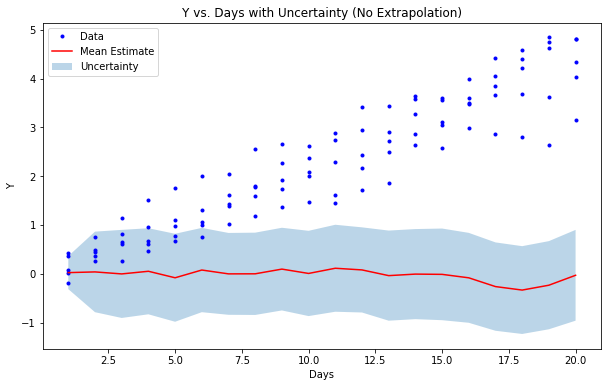

In [57]:
import matplotlib.pyplot as plt

# Extract the mean and uncertainty estimates for Days 1 to 20
mean_estimates = np.mean(posterior_samples[:, :20], axis=0)
uncertainty_estimates = np.std(posterior_samples[:, :20], axis=0)

# Plot Y against X['Days'] with uncertainty bounds
plt.figure(figsize=(10, 6))
plt.plot(X_scaled['Days'][:100], Y_array[:100], 'b.', label='Data')
plt.plot(X_scaled['Days'][:20], mean_estimates, 'r-', label='Mean Estimate')
plt.fill_between(X_scaled['Days'][:20], mean_estimates - uncertainty_estimates, mean_estimates + uncertainty_estimates, alpha=0.3, label='Uncertainty')
plt.xlabel('Days')
plt.ylabel('Y')
plt.title('Y vs. Days with Uncertainty (No Extrapolation)')
plt.legend()
plt.show()


In [58]:
# import PCA
from sklearn.decomposition import PCA
# Do PCA on X and print the variance explained by first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)
print('Variance explained by first two principal components:', np.sum(pca.explained_variance_ratio_))

Variance explained by first two principal components: 0.6337862393498415


In [60]:
X.to_csv('X.csv', index=False)

In [64]:
data_daily['Soiling Ratio'] = (((data_daily['DN_Voltage1'] - data_daily['DN_Voltage2']) / data_daily['DN_Voltage1'])*100).values
data_daily.to_csv('Y.csv', index=False)